In [1]:
library(graphicalExtremes)
library(maxstablePCA)
library(GGally)
library(dplyr)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
set.seed(17042024)

In [3]:
danube$info

RivNames,Lat,Long,AveVol,Lat_Center,Long_Center,Alt,Area,Chos,Density,Slope,PlotCoordX,PlotCoordY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Donau,48.58200,13.504000,1423.00000,48.19434,11.537729,826.6172,9.24909687,4,4870.474,13.264409,0,0
Donau,48.67663,13.115173,638.87746,48.51557,11.131992,624.3137,5.76796492,5,5003.040,9.885689,-2,-1
Donau,48.87976,12.747233,456.92169,48.62814,10.997088,603.4865,4.58691170,6,4896.329,9.518746,-4,-2
Donau,49.02358,12.138709,446.94998,48.61170,10.909059,615.9089,4.30697944,7,4907.390,9.648475,-4,-4
Donau,48.94696,12.014945,351.88196,48.33618,10.419301,649.6616,3.18819483,8,5019.066,9.845116,-2,-4
Donau,48.91661,11.864296,329.31747,48.23405,10.310134,674.7989,2.78700337,9,5072.189,10.068094,-2,-6
Donau,48.75742,11.426064,312.06499,48.18079,10.156106,707.6364,2.45730480,10,5115.251,10.489882,-2,-8
Donau,48.71074,10.801443,191.21095,48.24435,9.949147,653.4999,1.83826254,11,5066.171,9.351132,-2,-10
Donau,48.56840,10.500539,162.04203,48.09448,9.798394,701.1765,1.44211361,12,5130.739,9.788958,-2,-12


### Transform data to (approxmately) unit Pareto scale for the spectral measure estimator

In [4]:
Xtrafo <- transform_unitpareto(danube$data_clustered)

In [5]:
dim(Xtrafo)

[1] 428  31

In [6]:
summary(rowSums(Xtrafo))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.48   47.70   70.62  206.61  139.21 7092.21 

In [7]:
quantile(rowSums(Xtrafo), c(0.75, 0.8, 0.9, 0.95, 0.99), na.rm = T)

75%       80%       90%       95%       99% 
 139.2090  179.3545  377.9689  734.2403 2422.6935

In [8]:
length(which(apply(Xtrafo, 1, max) > 10))

[1] 117

For comparability with other methods, we use the same data, therefore choose the $l_{\infty}$-norm and set the threshold to the $0.1$ quantile of a standard pareto distribution. 

### Run the max-stable PCA fits 

Note that we do not parallelize to keep the code easy to read and to ensure reproducibility, therefore, the loop takes multiple hours. We refit the model for different random starting values to hit better local optima, possibly even a global one. Each model is fitted for $20$ different starting values. 

In [9]:
maxPCAlist <- list()
for(i in 1:100) {
    for(p in 1:12) {
        tmpPCA <- max_stable_prcomp(Xtrafo, p = p, s = 10, n_initial_guesses = 2500, norm = "linfty")
        if(i == 1) maxPCAlist[[p]] <- tmpPCA
        if(i > 1) {
            if(tmpPCA$loss_fctn_value < maxPCAlist[[p]]$loss_fctn_value) maxPCAlist[[p]] <- tmpPCA
        }
    }
}

# Printing the  models gives all information needed about the estimated matrices, reconstruction error and optimizer status

In [10]:
maxPCAlist[[2]]

$p
[1] 2

$d
[1] 31

$decoder_matrix
            [,1]        [,2]
 [1,] 0.82606712 0.349631880
 [2,] 0.35853400 1.128437636
 [3,] 0.12419413 1.185370818
 [4,] 0.06803333 1.258697432
 [5,] 0.03835258 1.258701660
 [6,] 0.07361376 1.258592326
 [7,] 0.16153923 1.258637767
 [8,] 0.06850449 1.135581821
 [9,] 0.13937711 1.198750813
[10,] 0.15456130 1.101154962
[11,] 0.52648579 0.848628527
[12,] 0.32449781 0.881094709
[13,] 0.81913493 0.055198303
[14,] 0.73713834 0.678903081
[15,] 0.81250420 0.496764562
[16,] 0.98263752 0.037793928
[17,] 1.02303306 0.025400913
[18,] 1.06757625 0.095596852
[19,] 1.18465714 0.028668242
[20,] 0.60844883 0.830444454
[21,] 0.77166077 0.483389147
[22,] 0.76845031 0.137317560
[23,] 0.23422469 0.636286640
[24,] 0.03096626 0.611428545
[25,] 0.36498853 0.755232590
[26,] 0.35786262 0.699214306
[27,] 0.36198020 0.755309478
[28,] 0.82932881 0.018810189
[29,] 0.79050331 0.004102387
[30,] 0.82142391 0.053417105
[31,] 0.76850067 0.005091644

$encoder_matrix
           [,1]   

In [11]:
maxPCAlist[[6]]

$p
[1] 6

$d
[1] 31

$decoder_matrix
              [,1]        [,2]         [,3]         [,4]        [,5]
 [1,] 0.0014061856 0.403407250 0.9417733917 0.2168437858 0.519308518
 [2,] 0.0765529936 0.047546564 0.0344440204 0.1414966114 1.268324045
 [3,] 0.0038885068 0.061053129 0.0019574489 0.1386002224 1.302555475
 [4,] 0.1810290533 0.051459087 0.0042929522 0.1490874060 1.309138767
 [5,] 0.0012298929 0.009629039 0.0087635594 0.0156216246 1.458463966
 [6,] 0.0089539313 0.003651002 0.0222494151 0.0017515653 1.479997673
 [7,] 0.0065235072 0.023660752 0.0116936046 0.0028783067 1.479949801
 [8,] 0.0057571573 0.018779559 0.0057563640 0.0016521231 1.460897149
 [9,] 0.0134714309 0.010201298 0.0128443573 0.0013081438 1.420505370
[10,] 0.0121936742 0.072410366 0.0091453175 0.0014984271 1.374153405
[11,] 0.0104259051 0.488941914 0.0319054991 0.0103599277 1.233256689
[12,] 0.0251451228 0.405998665 0.0086239926 0.0041237182 1.178124470
[13,] 0.0005406167 0.336168807 1.1958500418 0.0033435911 0.0201829

In [12]:
maxPCAlist[[7]]

$p
[1] 7

$d
[1] 31

$decoder_matrix
             [,1]         [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] 0.229255851 1.0354282890 0.357671913 0.001764536 0.223341274 0.019328693
 [2,] 0.085969348 0.0231140594 1.113114460 0.522973261 0.249768415 0.144283481
 [3,] 0.077265986 0.0031821406 1.178770905 0.023172554 0.331900091 0.211771886
 [4,] 0.010217053 0.0351494943 1.202377988 0.219636355 0.007605692 0.186314455
 [5,] 0.009034139 0.0288925531 1.314673033 0.070206365 0.001943592 0.080504373
 [6,] 0.146442004 0.0019423484 1.314665221 0.108930910 0.019924788 0.122984622
 [7,] 0.027465006 0.0264778013 1.314656676 0.057215431 0.001237837 0.426560666
 [8,] 0.013329311 0.0121112965 0.254372357 0.004437946 0.001640789 1.302929266
 [9,] 0.028808570 0.0084412715 0.247825554 0.001170691 0.004257329 1.194206728
[10,] 0.003507656 0.0038048140 0.155800733 0.111783818 0.004871413 1.254894778
[11,] 0.002182759 0.0505159313 1.011095133 0.452285858 0.003912729 0.106554970
[12,] 0.8580185

In [13]:
maxPCAlist[[10]]

$p
[1] 10

$d
[1] 31

$decoder_matrix
              [,1]        [,2]        [,3]        [,4]        [,5]         [,6]
 [1,] 0.0261265567 0.032597880 0.295344403 0.015093367 0.001516194 1.1923602539
 [2,] 0.0814087293 0.003715521 0.112114541 0.080585182 0.007714678 0.0437489138
 [3,] 0.0682167514 0.004418490 0.041636710 0.004126185 0.055821509 0.0051353934
 [4,] 0.0548956507 0.109720106 0.003959292 0.003786992 0.041470998 0.0014122587
 [5,] 0.0013961745 0.064386812 0.015879374 0.037188827 0.028242397 0.0012114319
 [6,] 0.0025629043 0.158604601 0.060209608 0.065631382 0.434772060 0.0088915352
 [7,] 0.0048471776 0.075234488 0.010494989 0.006772843 0.006044924 0.0036980533
 [8,] 0.0102526170 0.035628937 0.042608017 0.363463939 0.058967492 0.0070082835
 [9,] 0.0009909221 1.262427050 0.070326813 0.180549893 0.085092363 0.0009641578
[10,] 0.0047800482 0.060070533 0.241308199 0.928100482 0.070133590 0.0072119683
[11,] 0.0043918610 0.030009629 0.009040607 1.409830798 0.116881788 0.0199206172
[1

In [14]:
maxPCAlist[[6]]$encoder_matrix

0.010565853,0.003692456,0.012814650,0.008681422,0.011705917,0.011679115,0.01063702,0.021324215,0.004698205,0.007626078,⋯,0.009884741,0.141036510,0.6866212197,0.005253877,0.008152360,0.0115392538,0.0007083959,0.0040955427,0.0008196787,0.0020089859
0.027034774,0.007268011,0.015350821,0.071639677,0.017999973,0.007370207,0.04726137,0.005716931,0.012212547,0.024991962,⋯,0.686802051,0.003261851,0.0054546570,0.008150239,0.003350055,0.0134169262,0.0021055292,0.0082573926,0.0135693026,0.0015867635
0.003672888,0.011090264,0.009479967,0.008827904,0.005170409,0.005594268,0.01378534,0.008220628,0.006341137,0.003129439,⋯,0.003940306,0.003131207,0.0059023835,0.001275217,0.011332058,0.0004764125,0.0147159077,0.2643603558,0.0187777535,0.6039071183
0.028608526,0.040142080,0.026902783,0.040330422,0.002278441,0.018073591,0.01006044,0.036128912,0.012873759,0.006939866,⋯,0.004975243,0.003909620,0.0203402125,0.004415759,0.891203792,0.0160648097,0.0097328689,0.0054063096,0.0177630491,0.0002092626
0.005451492,0.094507856,0.281530680,0.215003755,0.424397546,0.675683879,0.02053916,0.169625165,0.015976093,0.119516841,⋯,0.012749901,0.008121010,0.0004712592,0.018372995,0.021215726,0.0093504408,0.0044680150,0.0037607801,0.0115842331,0.0260118853
0.008018489,0.018922453,0.002527755,0.044644608,0.014481896,0.004015631,0.02136978,0.002681552,0.019981976,0.026482481,⋯,0.041992396,0.002972817,0.0042093398,0.020977539,0.005413520,0.0090220654,0.0113352621,0.0005814973,0.0104054748,0.0377311024


### Create an elbow plot of the reconstuction errors of max-stable PCA for $p = 1, \ldots, 12$

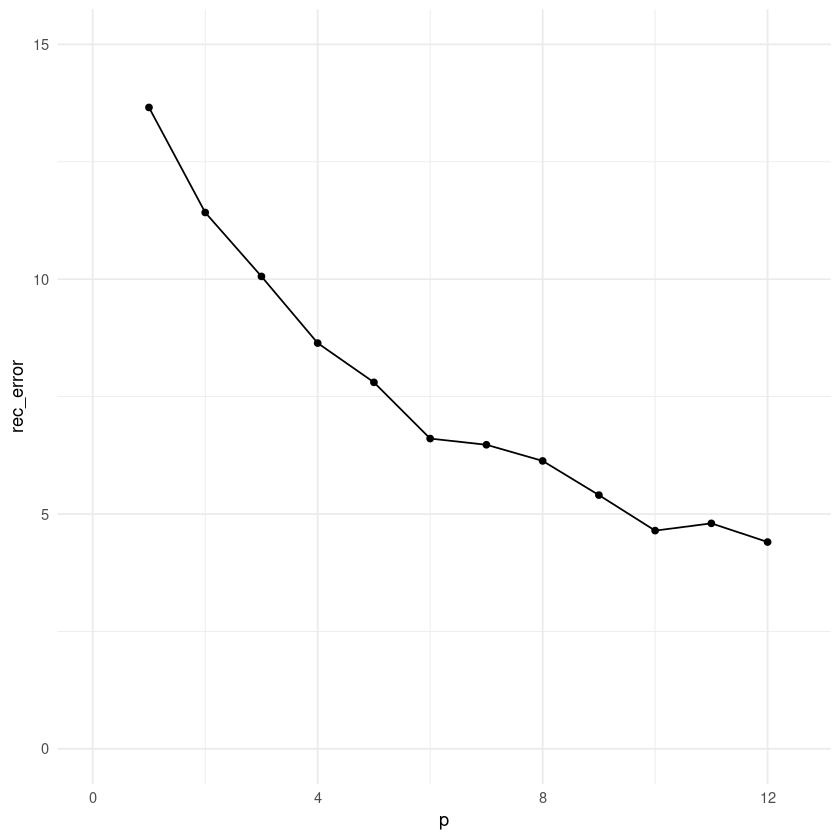

In [15]:
rec_error <- c()
for(p in 1:12) rec_error[p] <- maxPCAlist[[p]]$loss_fctn_value
plotlossdat_danube <- data.frame(
    p = 1:12, 
    rec_error = rec_error
)

# p7654321 <- ggplot(aes(x = p, y = rec_error), data = plotlossdat_danube) + geom_line() + theme_minimal()
p <- ggplot(aes(x = p, y = rec_error), data = plotlossdat_danube) + geom_line() + geom_point() + ylim(0,15) + xlim(0,12.5) + theme_minimal()
p 

$\rightarrow$ After around $p = 4$ to $p = 8$, the reconstruction error only improves very slowly, implying that a model of that dimension already captures many key characteristics of the data. For max-stable PCA that means that $p = 6$ is a good choice, firstly because there are $6$ distinct riverarms, secondly because choosing the simpler model is usually advised. 

In [16]:
ggsave("danube_elbow.pdf", p)

Saving 6.67 x 6.67 in image


# As a reminder, this is the flow graph of the danube river 

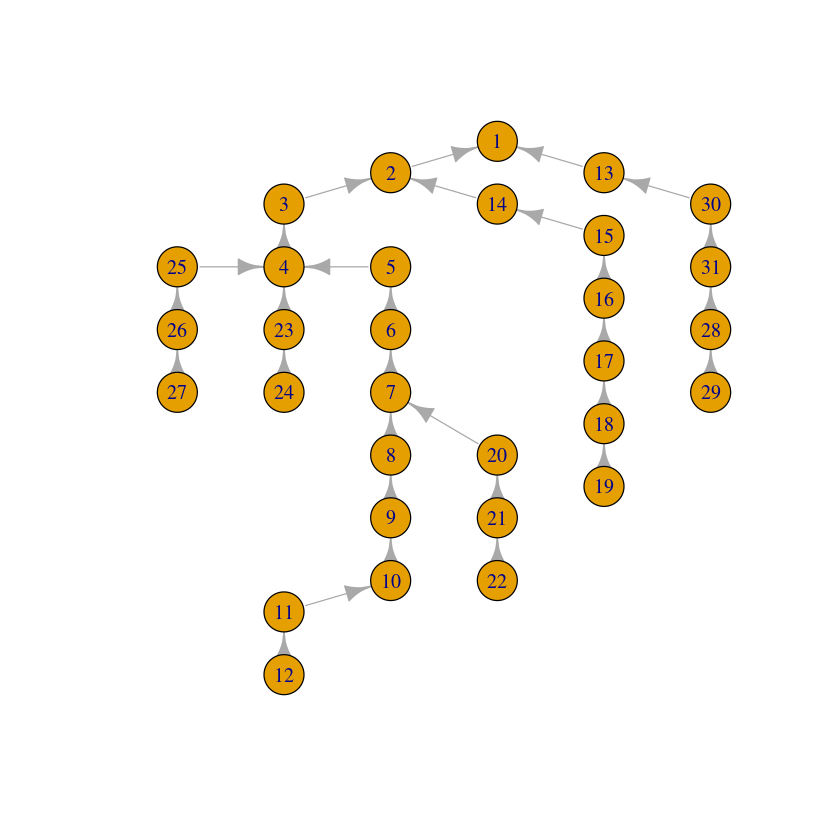

In [17]:
# provided by the R package graphicalExtremes
g <- igraph::graph_from_edgelist(danube$flow_edges)
loc <- as.matrix(danube$info[,c('PlotCoordX', 'PlotCoordY')])
plot(g, layout = loc)

In [18]:
donau_iller <- 1:12
lech <- 20:22
naab <- 23:24
regen <- 25:27
isar <- 14:19
inn <- c(13, 28:31)

In [19]:
danube$info$arm <- NA
danube$info$arm[donau_iller] <- "arm1"
danube$info$arm[lech] <- "arm2"
danube$info$arm[naab] <- "arm3"
danube$info$arm[regen] <- "arm4"
danube$info$arm[isar] <- "arm5"
danube$info$arm[inn] <- "arm6"

In [20]:
danube$info

RivNames,Lat,Long,AveVol,Lat_Center,Long_Center,Alt,Area,Chos,Density,Slope,PlotCoordX,PlotCoordY,arm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Donau,48.58200,13.504000,1423.00000,48.19434,11.537729,826.6172,9.24909687,4,4870.474,13.264409,0,0,arm1
Donau,48.67663,13.115173,638.87746,48.51557,11.131992,624.3137,5.76796492,5,5003.040,9.885689,-2,-1,arm1
Donau,48.87976,12.747233,456.92169,48.62814,10.997088,603.4865,4.58691170,6,4896.329,9.518746,-4,-2,arm1
Donau,49.02358,12.138709,446.94998,48.61170,10.909059,615.9089,4.30697944,7,4907.390,9.648475,-4,-4,arm1
Donau,48.94696,12.014945,351.88196,48.33618,10.419301,649.6616,3.18819483,8,5019.066,9.845116,-2,-4,arm1
Donau,48.91661,11.864296,329.31747,48.23405,10.310134,674.7989,2.78700337,9,5072.189,10.068094,-2,-6,arm1
Donau,48.75742,11.426064,312.06499,48.18079,10.156106,707.6364,2.45730480,10,5115.251,10.489882,-2,-8,arm1
Donau,48.71074,10.801443,191.21095,48.24435,9.949147,653.4999,1.83826254,11,5066.171,9.351132,-2,-10,arm1
Donau,48.56840,10.500539,162.04203,48.09448,9.798394,701.1765,1.44211361,12,5130.739,9.788958,-2,-12,arm1


In [21]:
reconstr <- data.frame(t(maxmatmul(maxPCAlist[[7]]$reconstr_matrix, t(transform_unitfrechet(Xtrafo)))))
reconstr$is_rec <- T
plotdat <- data.frame(transform_unitfrechet(Xtrafo))
plotdat$is_rec <- F
plotdat <- full_join(plotdat, reconstr)

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15,
X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, is_rec)`


# Create a bivariate margin pairplot of the maxima of the riverarms

Joining with `by = join_by(arm1, arm2, arm3, arm4, arm5, arm6, is_rec)`


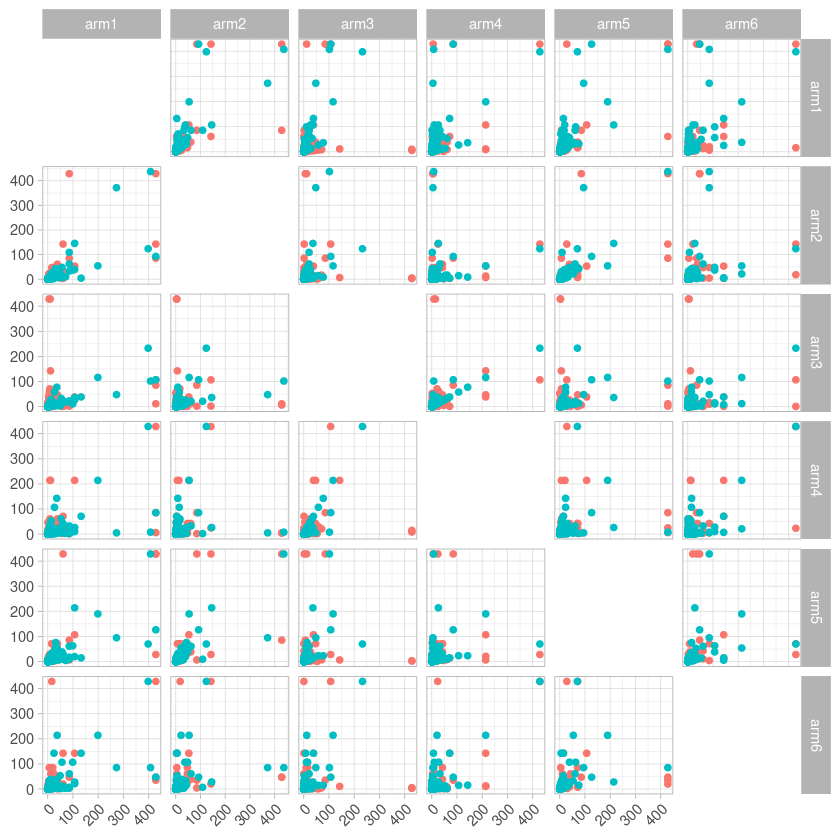

In [22]:
arm1 = transform_unitfrechet(apply(Xtrafo[,donau_iller], 1, max))
arm2 = transform_unitfrechet(apply(Xtrafo[, lech], 1, max))
arm3 = transform_unitfrechet(apply(Xtrafo[, naab], 1, max))
arm4 = transform_unitfrechet(apply(Xtrafo[, regen], 1, max))
arm5 = transform_unitfrechet(apply(Xtrafo[, isar], 1, max))
arm6 = transform_unitfrechet(apply(Xtrafo[, inn], 1, max))

dat_plot_riverarm_max <- data.frame(
    arm1 = arm1, 
    arm2 = arm2, 
    arm3 = arm3, 
    arm4 = arm4, 
    arm5 = arm5, 
    arm6 = arm6
)

dat_plot_riverarm_max$is_rec = "No"
recarm1 <- apply(reconstr[, donau_iller], 1, max)
recarm2 = apply(reconstr[, lech], 1, max)
recarm3 = apply(reconstr[, naab], 1, max)
recarm4 = apply(reconstr[, regen], 1, max)
recarm5 = apply(reconstr[, isar], 1, max)
recarm6 = apply(reconstr[, inn], 1, max)

tmp <- data.frame(
    arm1 = recarm1, 
    arm2 = recarm2, 
    arm3 = recarm3, 
    arm4 = recarm4, 
    arm5 = recarm5, 
    arm6 = recarm6, 
    is_rec = "Yes"
)

dat_plot_riverarm_max <- full_join(dat_plot_riverarm_max, tmp)


pdanube <- ggpairs(
    dat_plot_riverarm_max, columns = 1:6, aes(color = is_rec),
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_light() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

pdanube

In [23]:
ggsave("pairplot_danube.png", pdanube, width = 12, height = 12, dpi = 320)

### plot the river arms for better data presentation

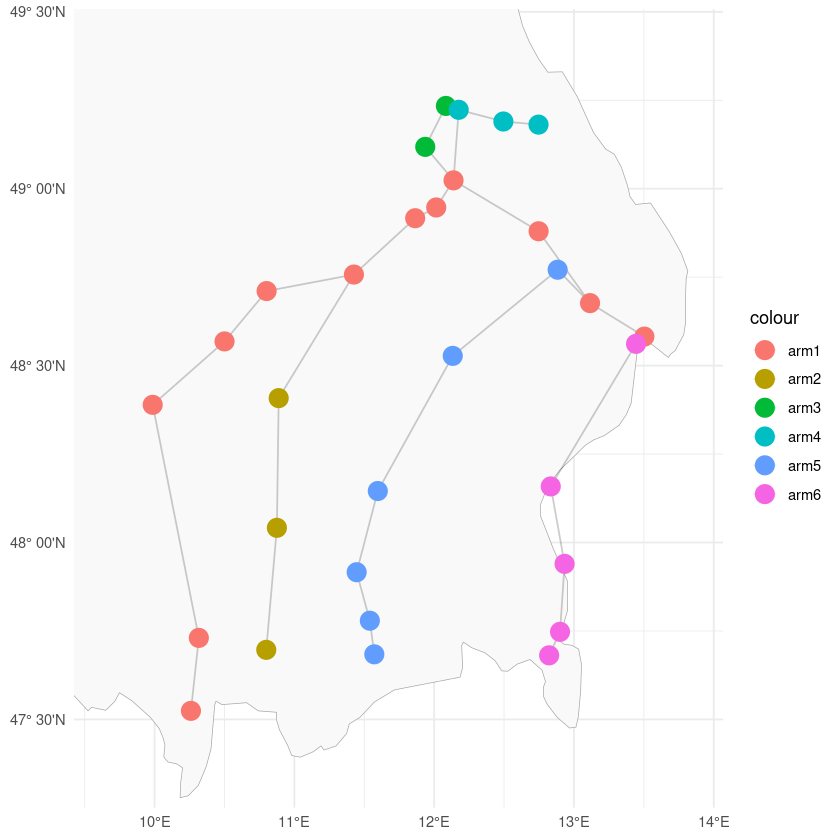

In [24]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)

pdanube_arms <- p + geom_point(aes(x = Long, y = Lat, color = arm), data = danube$info, size = 5) + theme_minimal()
pdanube_arms

In [25]:
ggsave("arms_danube.pdf", pdanube_arms, width = 12, height = 12, dpi = 320)

In [26]:
enc <- t(maxmatmul(maxPCAlist[[6]]$encoder_matrix, t(transform_unitfrechet(Xtrafo))))

### Bivariate margin plots of the encoded data $W \diamond X$

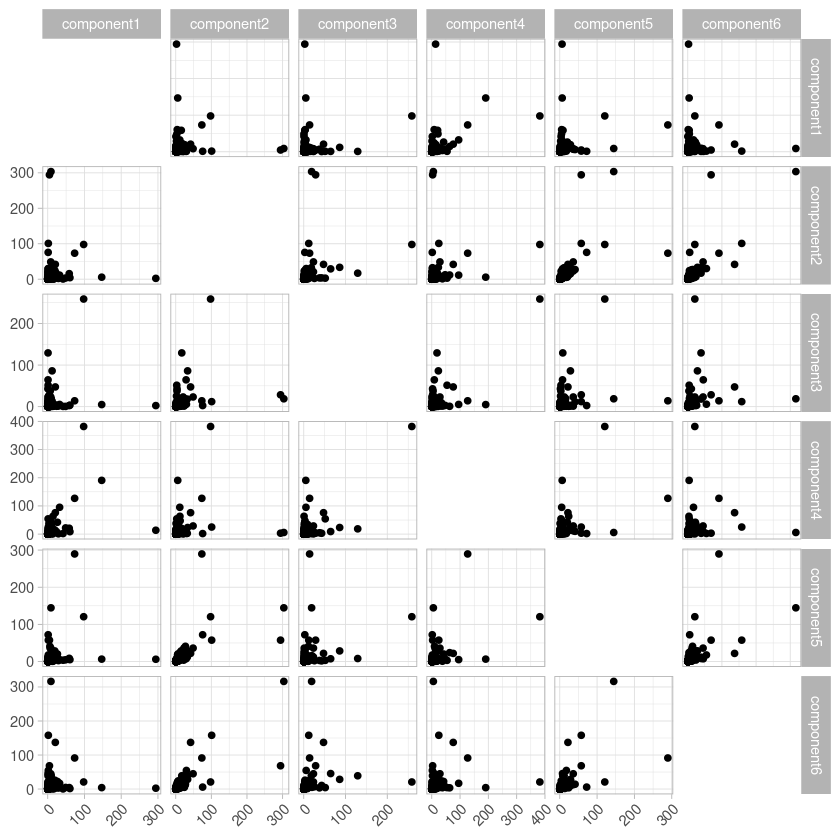

In [27]:
penc_dat <- data.frame(enc)
names(penc_dat) <- paste0("component", 1:6)
penc <- ggpairs(
    penc_dat,
    columns = 1:6,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_light() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
penc

In [28]:
ggsave("danube_encoded.png", penc)

Saving 6.67 x 6.67 in image


### Create a heatmap of the matrix W to inspect which stations are loaded

In [29]:
install.packages("maps")

Installing package into ‘/home/reinbott/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



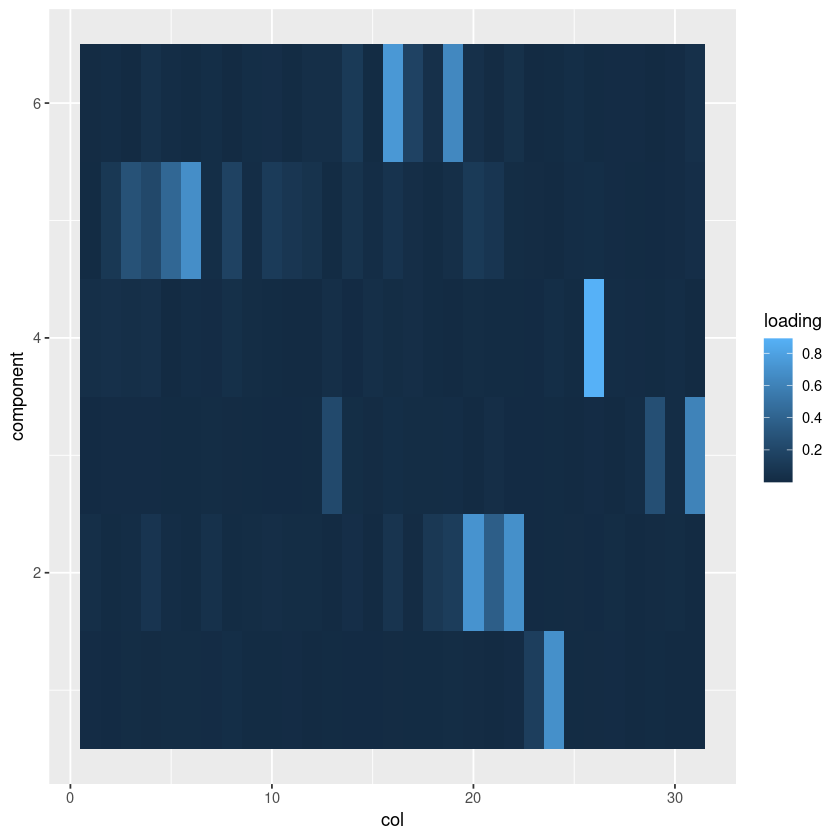

In [30]:
d2.df <- reshape2::melt(maxPCAlist[[6]]$encoder_matrix, c("component", "col"), value.name = "loading")
enc_heatmap <- ggplot(data=d2.df,aes(x=col,y=component,fill=loading))+
  geom_tile()

enc_heatmap

In [31]:
# a list of the entries in the reconstruction that end up being large (> 0.7)
which(maxPCAlist[[6]]$reconstr_matrix > 0.7, arr.ind = T)

row,col
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6
10,6
11,6


In [32]:
ggsave("danube_loadings_heatmap.pdf", enc_heatmap)

Saving 6.67 x 6.67 in image


### Create plots of the rows of W mapped to the spatial locations of the measurement stations to visualize which entries are important for the components

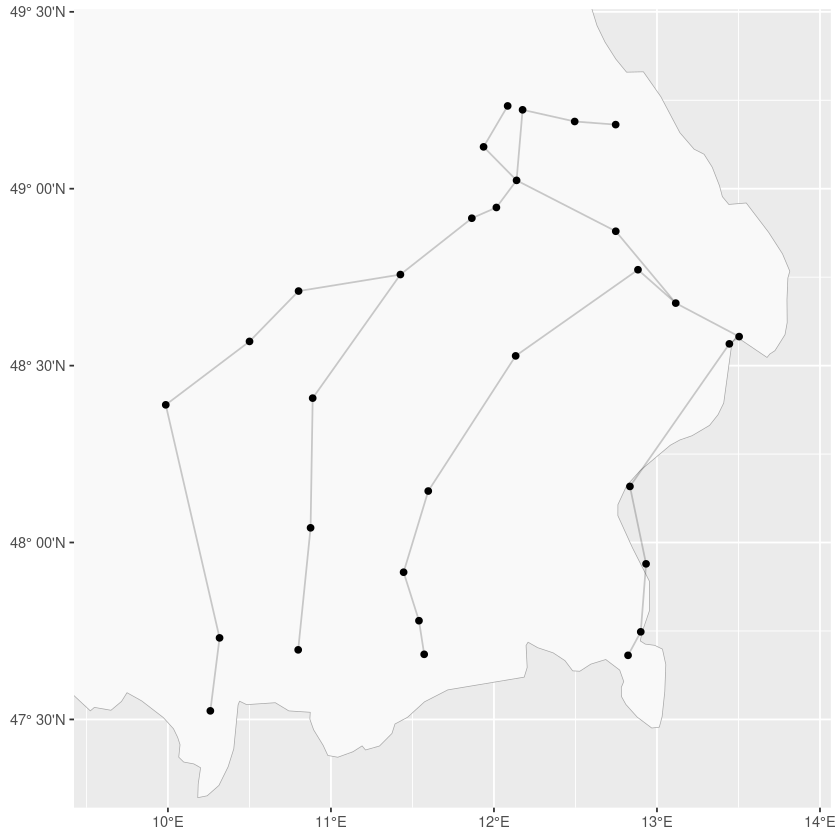

In [33]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)
p

In [34]:
enc <- maxPCAlist[[6]]$encoder_matrix
enc <- data.frame(t(enc))
names(enc) <- paste0("component", 1:6)
enc$lat <- danube$info$Lat
enc$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


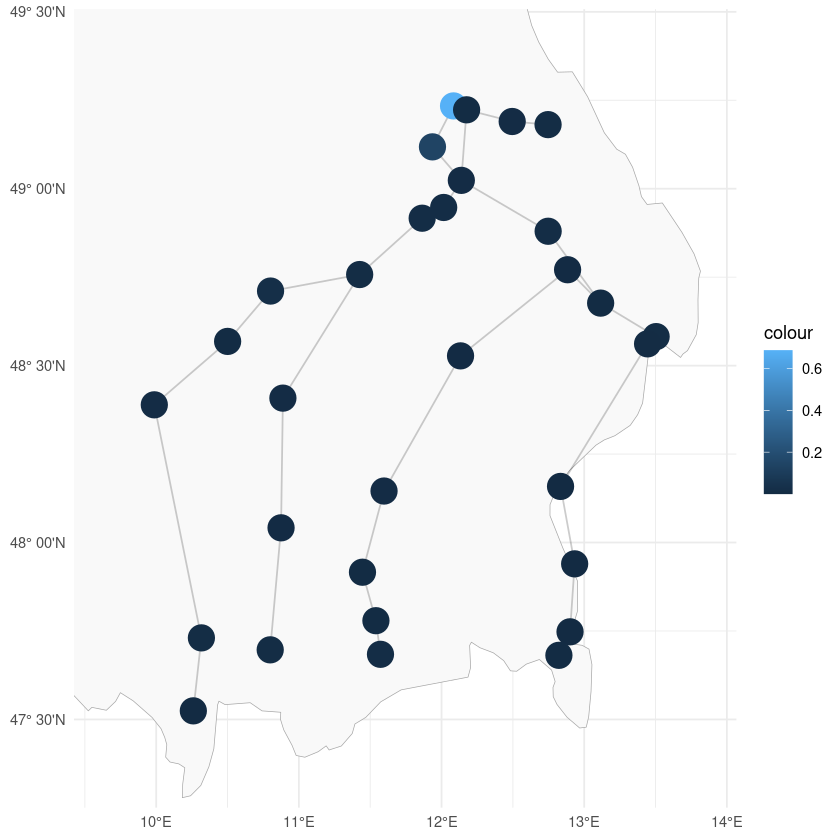

In [35]:
pc1 <- p + geom_point(aes(x = lon, y = lat, color = component1), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc1.pdf", pc1)
pc1

Saving 6.67 x 6.67 in image


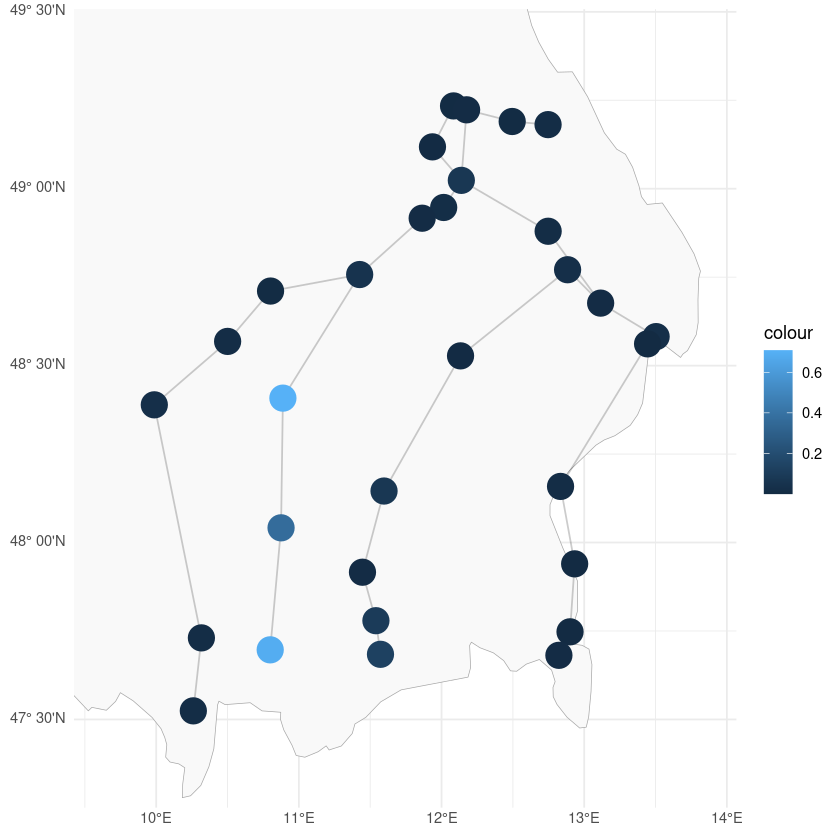

In [36]:
pc2 <- p + geom_point(aes(x = lon, y = lat, color = component2), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc2.pdf", pc2)
pc2

Saving 6.67 x 6.67 in image


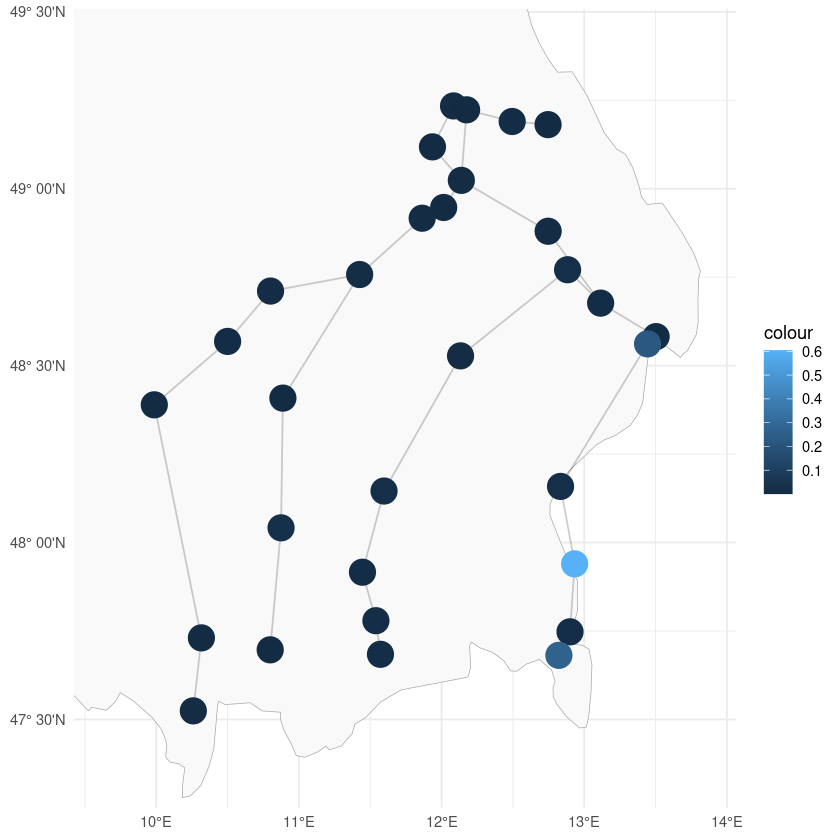

In [37]:
pc3 <- p + geom_point(aes(x = lon, y = lat, color = component3), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc3.pdf", pc3)
pc3

Saving 6.67 x 6.67 in image


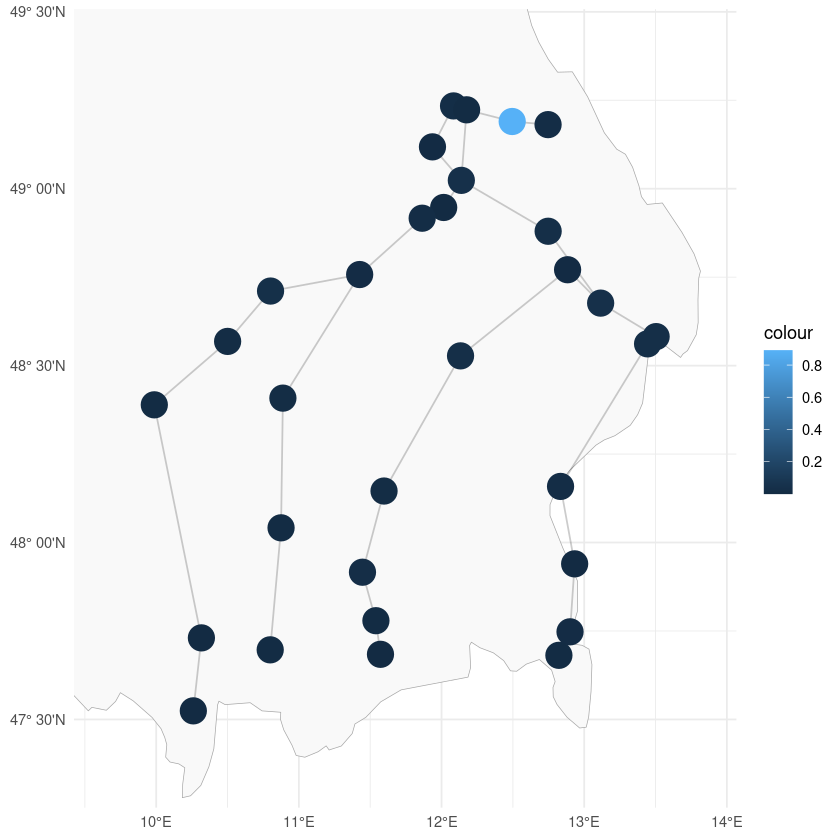

In [38]:
pc4 <- p + geom_point(aes(x = lon, y = lat, color = component4), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc4.pdf", pc4)
pc4

Saving 6.67 x 6.67 in image


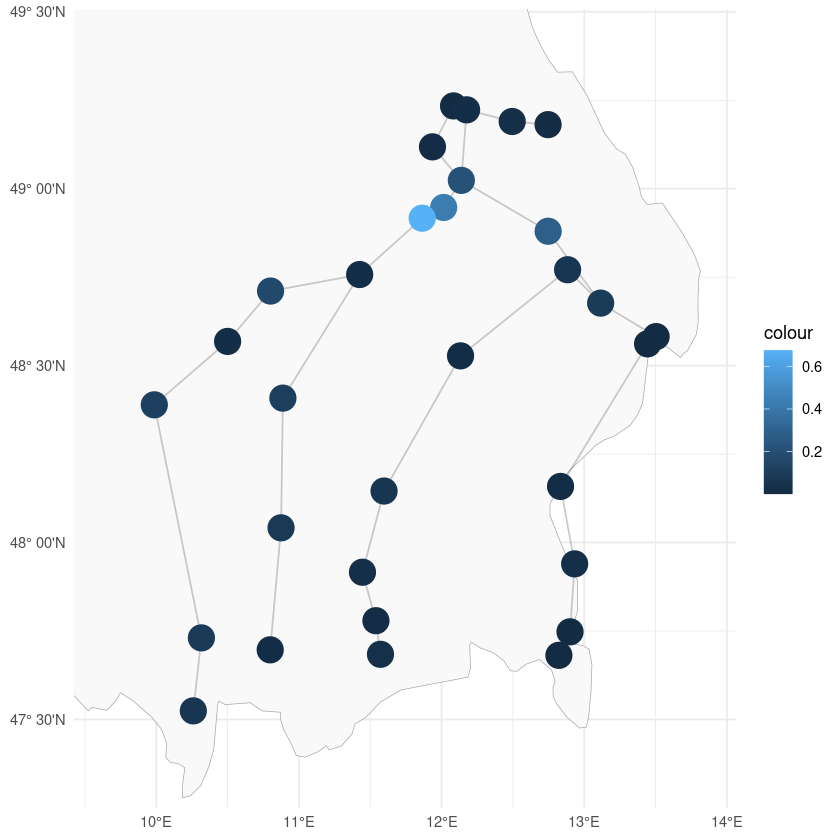

In [39]:
pc5 <- p + geom_point(aes(x = lon, y = lat, color = component5), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc5.pdf", pc5)
pc5

Saving 6.67 x 6.67 in image


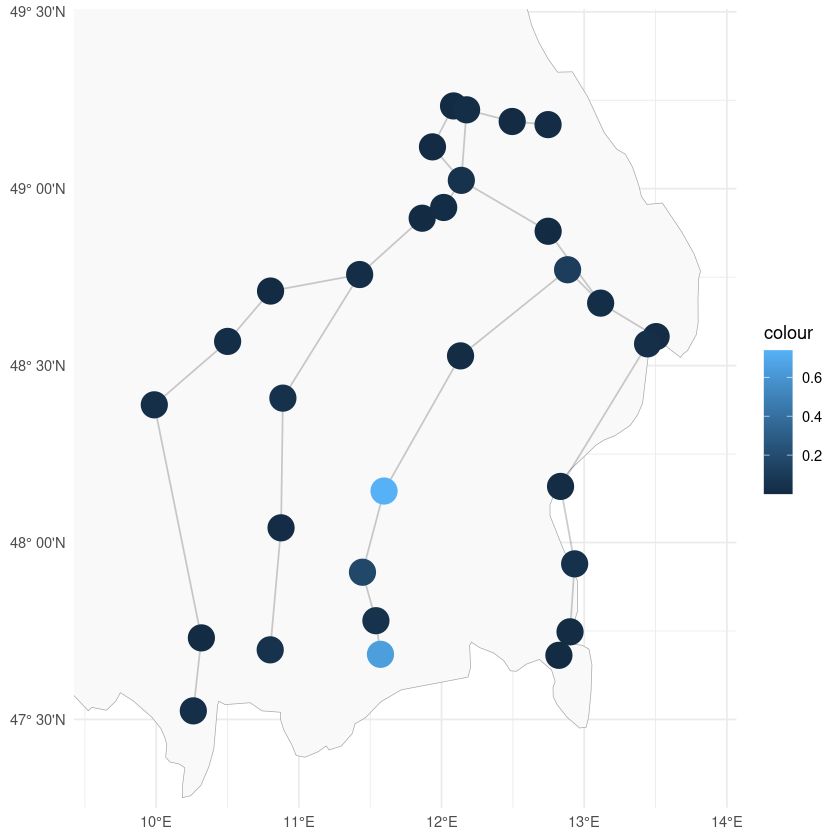

In [40]:
pc6 <- p + geom_point(aes(x = lon, y = lat, color = component6), size = 7, data = enc) +
theme_minimal()
ggsave("danube_pc6.pdf", pc6)
pc6

### Create plots of the columns of $B$ spatially mapped

The columns can be seen as prototypical extreme events similiar to max-linear models, due to the possible presence of dependence of the encoded state $W \diamond X$ however, one might only observe max-linear combinations of the columns. 

In [41]:
dec <- maxPCAlist[[6]]$decoder_matrix
dec <- data.frame(dec)
names(dec) <- paste0("event", 1:6)
dec$lat <- danube$info$Lat
dec$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


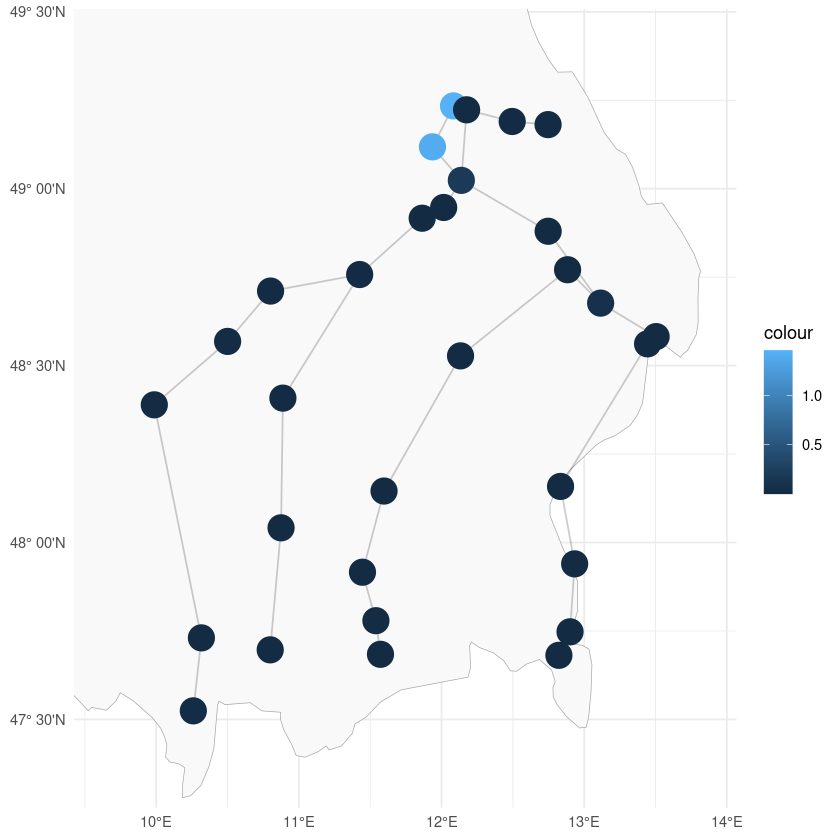

In [42]:
ev1 <- p + geom_point(aes(x = lon, y = lat, color = event1), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev1.pdf", ev1)
ev1

Saving 6.67 x 6.67 in image


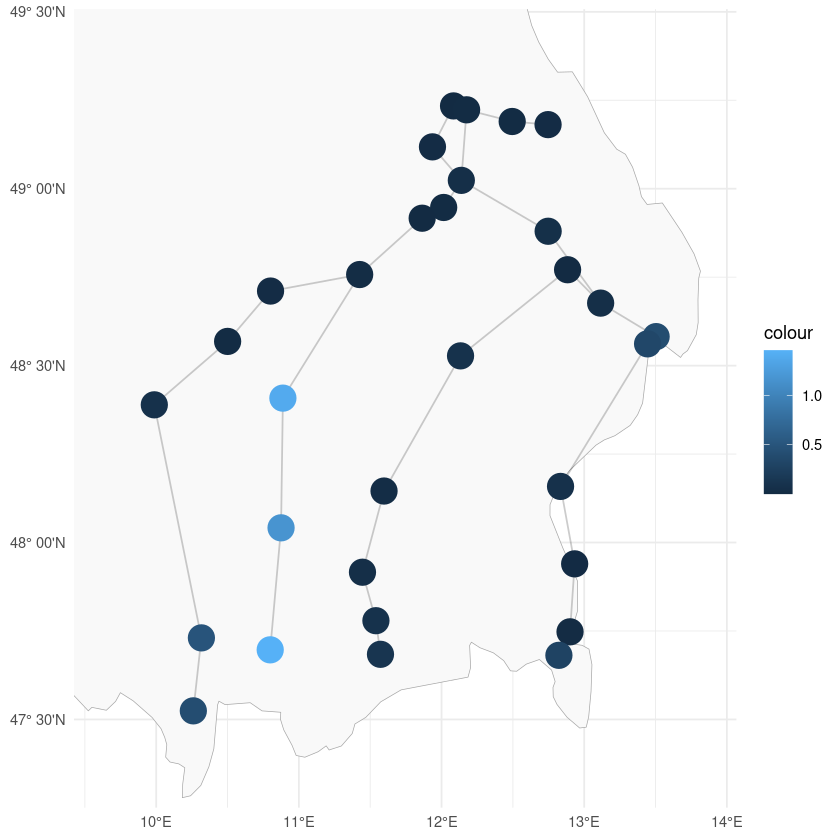

In [43]:
ev2 <- p + geom_point(aes(x = lon, y = lat, color = event2), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev2.pdf", ev2)
ev2

Saving 6.67 x 6.67 in image


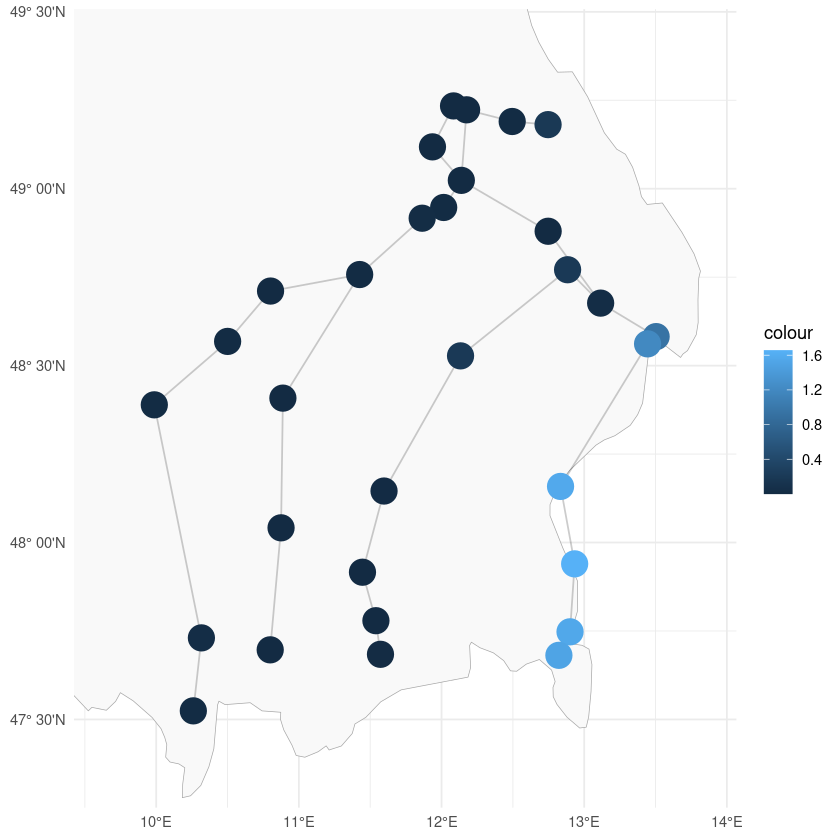

In [44]:
ev3 <- p + geom_point(aes(x = lon, y = lat, color = event3), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev3.pdf", ev3)
ev3

Saving 6.67 x 6.67 in image


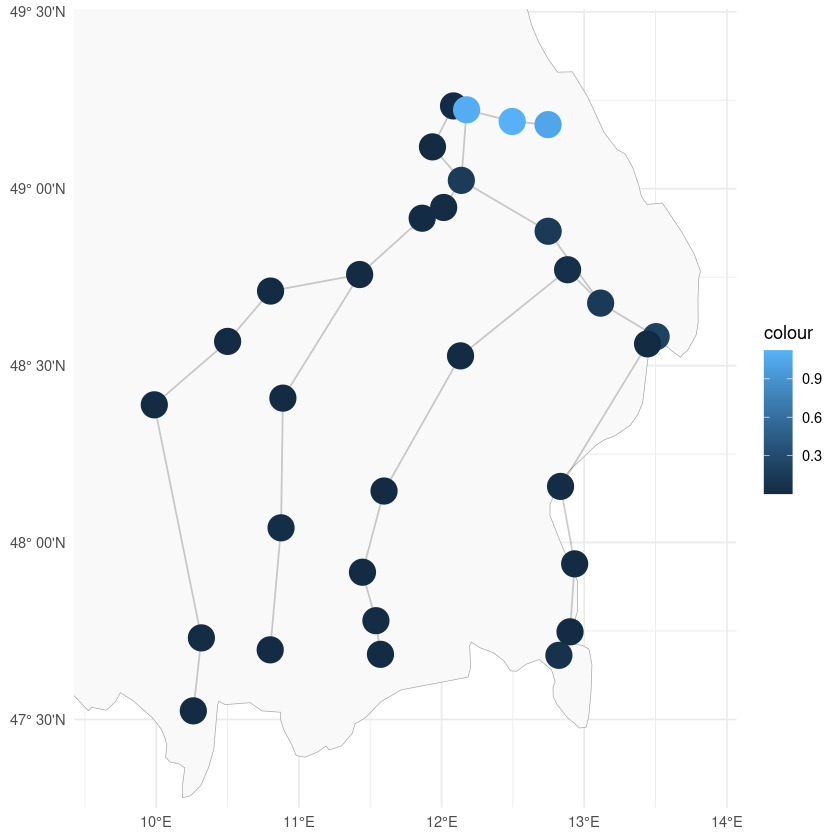

In [45]:
ev4 <- p + geom_point(aes(x = lon, y = lat, color = event4), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev4.pdf", ev4)
ev4

Saving 6.67 x 6.67 in image


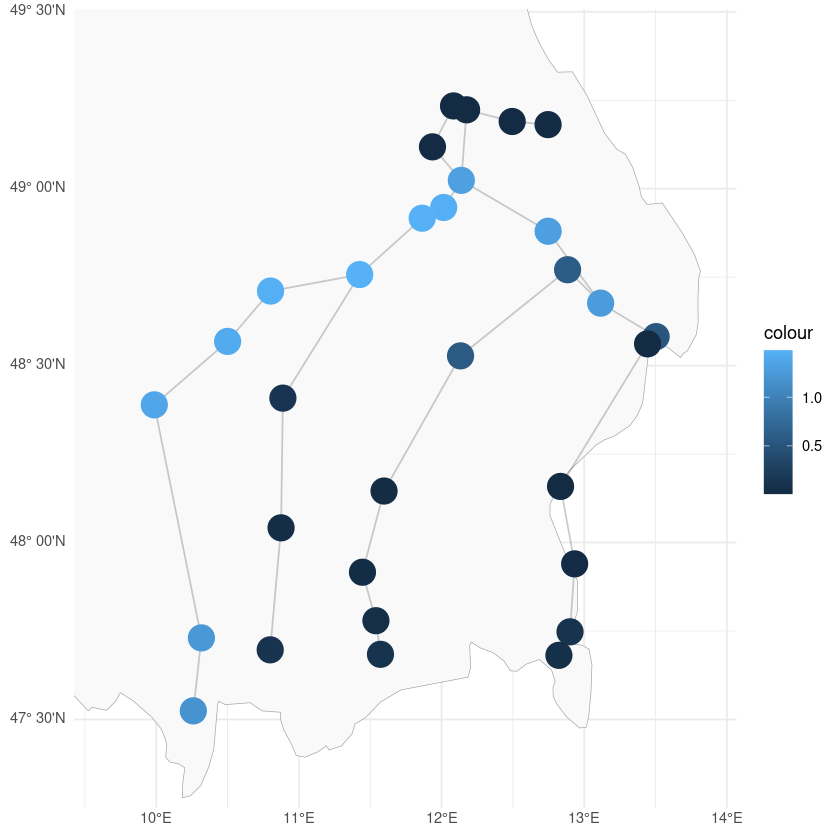

In [46]:
ev5 <- p + geom_point(aes(x = lon, y = lat, color = event5), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev5.pdf", ev5)
ev5

Saving 6.67 x 6.67 in image


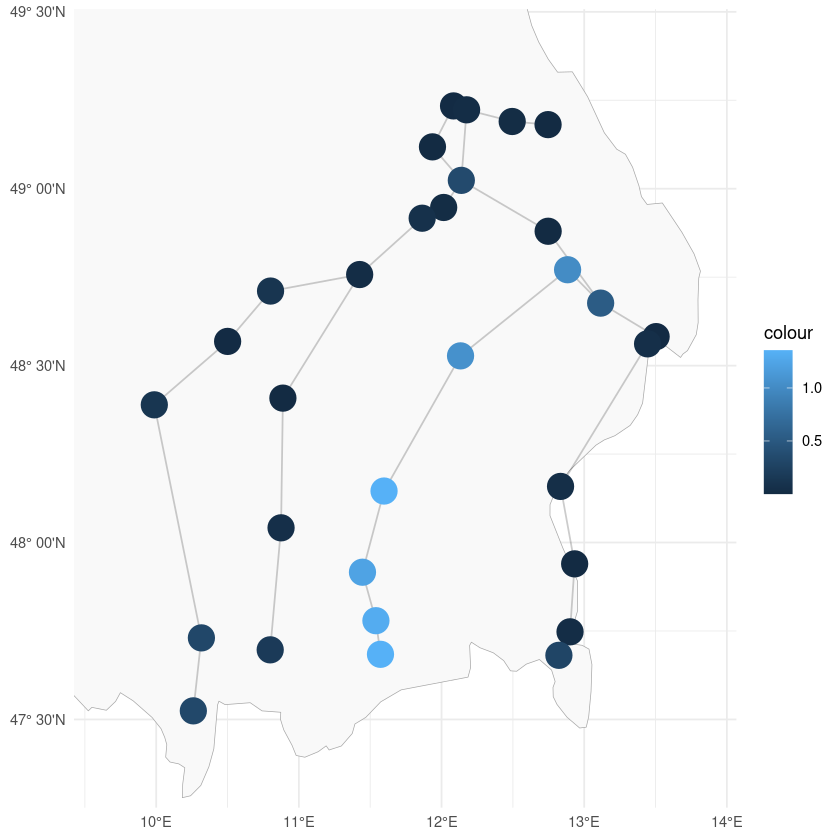

In [47]:
ev6 <- p + geom_point(aes(x = lon, y = lat, color = event6), size = 7, data = dec) +
theme_minimal()
ggsave("danube_ev6.pdf", ev6)
ev6